     Time Slot  Peak Probability
0            0              0.25
1            1              0.25
2            2              0.25
3            3              0.25
4            4              0.25
..         ...               ...
667        667              0.25
668        668              0.25
669        669              0.25
670        670              0.25
671        671              0.25

[672 rows x 2 columns]


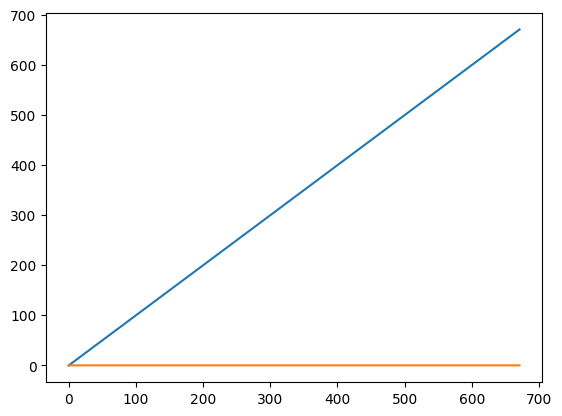

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('PCB Electric.csv')

df['Time'] = df['Timestamp'].copy()

df['Timestamp'] = pd.to_datetime(df['Timestamp']).dt.tz_localize(None)
df['Time'] = pd.to_datetime(df['Time']).dt.tz_localize(None)
df.set_index('Timestamp', inplace=True)

for c in df.columns[:-1]:
    df[c] = df[c].str.extract('(\d+)').astype(float)

one_week = 672
pavg = np.zeros((one_week, 12))
p = np.zeros(one_week)
df['dow'] = df['Time'].dt.to_period('M').dt.start_time.dt.weekday

highest_kw_probabilities = []

for j in range(one_week):
    highest_kw_count = 0
    total_count = 0
    
    for i in range(12):
        md = df[df.index.month == i+1]
        highest_kw = np.max(md['PCB PCB-Virtual Power'].iloc[j::one_week])
        highest_kw_count += sum(md['PCB PCB-Virtual Power'].iloc[j::one_week] == highest_kw)
        total_count += md.shape[0] // one_week
    
    highest_kw_probability = highest_kw_count / total_count
    highest_kw_probabilities.append(highest_kw_probability)

table_df = pd.DataFrame({
    'Time Slot': range(one_week),
    'Peak Probability': highest_kw_probabilities
})

print(table_df)

plt.plot(table_df)